## Python Crawler Individual Assignment

In [794]:
from bs4 import BeautifulSoup
import pandas as pd
import requests, threading, time, random
from datetime import datetime
import json

lst_closing_date = []
lst_name = []
lst_id = []
lst_mod_date = []
lst_url = []
lst_status = []


for i in range(-1,4):
    i = i + 1
    url = 'https://api.sgx.com/ipoprospectus/v1.0/?params=closing_date%2Cname%2Cid%2Cmodified_date%2Curl%2Cstatus&pagesize=250&pagestart='+ str(i)
    req = requests.get(url)
    text = req.text
    data = json.loads(text)['data']
    
    for i in range(len(data)):
        s1 = data[i]
    
        try:
            lst_closing_date.append(datetime.fromtimestamp(int(str(s1['closing_date'])[:-3])))   
        
        except:
            lst_closing_date.append('None')
        
        lst_name.append(s1['name'])
        lst_id.append(s1['id'])
        lst_mod_date.append(s1['modified_date'])
        lst_url.append(s1['url'])
        lst_status.append(s1['status'])
    
    df_ipo = pd.DataFrame({
        'closing_date':lst_closing_date,
        'name':lst_name,
        'id':lst_id,
        'mod_date':lst_mod_date,
        'url':lst_url,
        'status':lst_status
    })


In [795]:
df_ipo 

,closing_date,name,id,mod_date,url,status
0,None,CSOP CGS-CIMB FTSE APAC LC ETF,3375,09/21/2022 07:59:04 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed
1,2022-09-14 12:00:00,FPTREA S$500M4.49%B270916,3374,09/16/2022 09:18:30 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed
2,None,DBXT IBOXX SINGAPORE ETF 5,2992,07/21/2022 10:52:07 AM,https://links.sgx.com/1.0.0/ipo-prospectus/299...,Completed
3,None,EMPERADOR INC.,3372,07/14/2022 12:39:17 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed
4,None,LYXOR ETF ASIA EX 10,2915,06/20/2022 02:37:42 PM,https://links.sgx.com/1.0.0/ipo-prospectus/291...,Completed
...,...,...,...,...,...,...
1036,1997-01-23 12:00:00,IDT HOLDINGS (SINGAPORE) LIMITED,2274,09/30/1997 07:10:45 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed
1037,1997-01-22 12:00:00,SECOND CHANCE ENTERPRISES LTD,2273,01/29/2009 08:48:03 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed
1038,1997-01-21 12:00:00,LUNG KEE METAL HOLDINGS LIMITED,2282,11/25/1998 04:00:37 AM,https://links.sgx.com/1.0.0/ipo-prospectus/228...,Completed
1039,1997-01-20 12:00:00,CHUAN SOON HUAT INDUSTRIAL GROUP LTD,2270,01/29/2009 06:43:41 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed


$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Table 1 

In [788]:
lst_company_registration = []
lst_company_introduction = []
lst_prospectus_url = []
lst_issue_manager_and_underwriters = []

for i in range(-1,1040):
    i = i + 1
    url_2 = df_ipo.loc[i, 'url'] 
    req = requests.get(url_2)
    soup = BeautifulSoup(req.text, 'html.parser')  
    soup.contents
    div = soup.select('div[class="announcement-group"]')
    div[0].select('span')
    registration_info = div[0].select('span')[1].get_text()
    
    dd = div[0].select('dd[class="announcement-richtext"]')
    dd[0].get_text()
    company_intro = dd[0].get_text().replace('\r', '').replace('\n','')
    
    div[2].select('a[class="announcement-attachment"]') 
    
    try:
       div[2].select('a')[0].attrs['href'] 
           
    except:
       prospectus_url = '[]'
    
    else:     
        for b in range(-1,15):
            b = b + 1

            try:
                prospectus_url = 'https://links.sgx.com/' + div[2].select('a')[b].attrs['href'] 
                
            except:
                pass
    
    
    issuer = div[3].select('div[class="announcement-richtext"]')[0].get_text()
    
    

    lst_company_registration.append(registration_info)
    lst_company_introduction.append(company_intro)
    lst_prospectus_url.append(prospectus_url)
    lst_issue_manager_and_underwriters.append(issuer)

In [797]:
df_ipo.insert(loc=6, column="company_registration", value=lst_company_registration)
df_ipo.insert(loc=7, column="company_introduction", value=lst_company_introduction)
df_ipo.insert(loc=8, column="prospectus_url", value=lst_prospectus_url)
df_ipo.insert(loc=9, column="issue_manager_and_underwriters", value=lst_issue_manager_and_underwriters)

In [798]:
df_ipo

,closing_date,name,id,mod_date,url,status,company_registration,company_introduction,prospectus_url,issue_manager_and_underwriters
0,None,CSOP CGS-CIMB FTSE APAC LC ETF,3375,09/21/2022 07:59:04 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed,,This Sub-Fund is only suitable for...,https://links.sgx.com//FileOpen/CSOP%20CGS-CIM...,CSOP Asset Management Pte. Ltd.
1,2022-09-14 12:00:00,FPTREA S$500M4.49%B270916,3374,09/16/2022 09:18:30 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed,(incorporated with limited liability in Singap...,,https://links.sgx.com//FileOpen/FPL-Pricing%20...,"DBS Bank Ltd., Oversea-Chinese Banking\nCorpor..."
2,None,DBXT IBOXX SINGAPORE ETF 5,2992,07/21/2022 10:52:07 AM,https://links.sgx.com/1.0.0/ipo-prospectus/299...,Completed,,db x-trackers II Markit iBoxx ABF ...,https://links.sgx.com//FileOpen/PHS%20(SINGAPO...,
3,None,EMPERADOR INC.,3372,07/14/2022 12:39:17 AM,https://links.sgx.com/1.0.0/ipo-prospectus/337...,Completed,(incorporated with limited liability in the Re...,Emperador Inc. (the “Company”) is an integrate...,https://links.sgx.com//FileOpen/Emperador%20In...,"J.P. Morgan (S.E.A.) Limited and UBS AG, Singa..."
4,None,LYXOR ETF ASIA EX 10,2915,06/20/2022 02:37:42 PM,https://links.sgx.com/1.0.0/ipo-prospectus/291...,Completed,,,https://links.sgx.com//FileOpen/2022(3)%20Sing...,
...,...,...,...,...,...,...,...,...,...,...
1036,1997-01-23 12:00:00,IDT HOLDINGS (SINGAPORE) LIMITED,2274,09/30/1997 07:10:45 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed,(Incorporated in the Republic of Singapore on ...,The Company IDT Holdings (Singapor...,[],"Lead Manager, Underwriter and Placement Agent:..."
1037,1997-01-22 12:00:00,SECOND CHANCE ENTERPRISES LTD,2273,01/29/2009 08:48:03 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed,(Incorporated in the Republic of Singapore on ...,The Company The Company was incorp...,[],"Manager, Underwriter and Placement Agent:\n\nT..."
1038,1997-01-21 12:00:00,LUNG KEE METAL HOLDINGS LIMITED,2282,11/25/1998 04:00:37 AM,https://links.sgx.com/1.0.0/ipo-prospectus/228...,Completed,(Incorporated in Bermuda on 24 September 1996),"Corporate profile Founded in 1984,...",[],
1039,1997-01-20 12:00:00,CHUAN SOON HUAT INDUSTRIAL GROUP LTD,2270,01/29/2009 06:43:41 AM,https://links.sgx.com/1.0.0/ipo-prospectus/227...,completed,(Incorporated in the Republic of Singapore on ...,The Company was incorporated on 25...,[],Manager and Lead Underwriter: \n\nUNITED OVERS...


$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Table 2 

### Optional Part

In [799]:
for i in range(-1,1040):
    i = i + 1
    url_2 = df_ipo.loc[i, 'url'] 
    req = requests.get(url_2)
    soup = BeautifulSoup(req.text, 'html.parser')  
    soup.contents
    div = soup.select('div[class="announcement-group"]')
    div[2].select('a[class="announcement-attachment"]') 
    
  
    for b in range(-1,15):
            b = b + 1

            try:
                prospectus_url2 = 'https://links.sgx.com/' + div[2].select('a')[b].attrs['href'] 
                name = div[0].select('span')[0].get_text() 
                mod_string = ""
                for elem in name:
                        if elem.isalnum() or elem == ' ':
                            mod_string += elem
                name = mod_string 
                name = re.sub("[$@&%1234567890]","",name) + str(b+1)
                pdf_file= requests.get(prospectus_url2)
                with open('ipo/{}.pdf'.format(name),'wb') as myfile:
                        myfile.write(pdf_file.content)

            except:
                pass

#### Results of downloaded IPO prospectus:

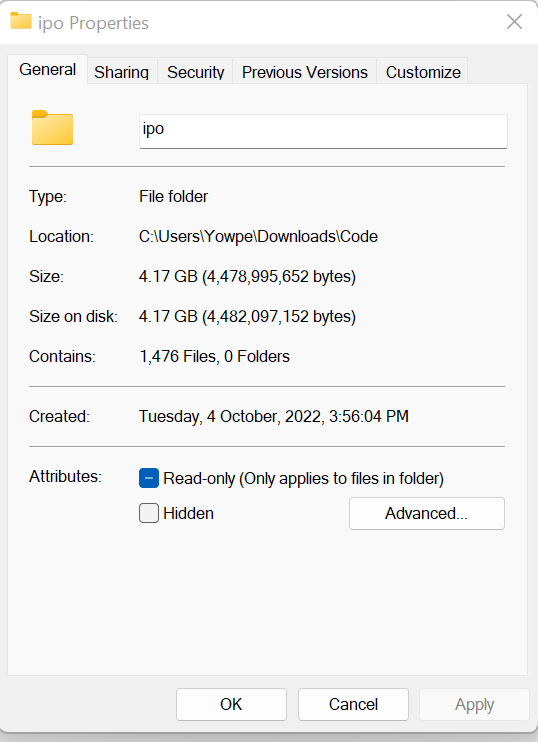

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Figure 1.1 File Properties

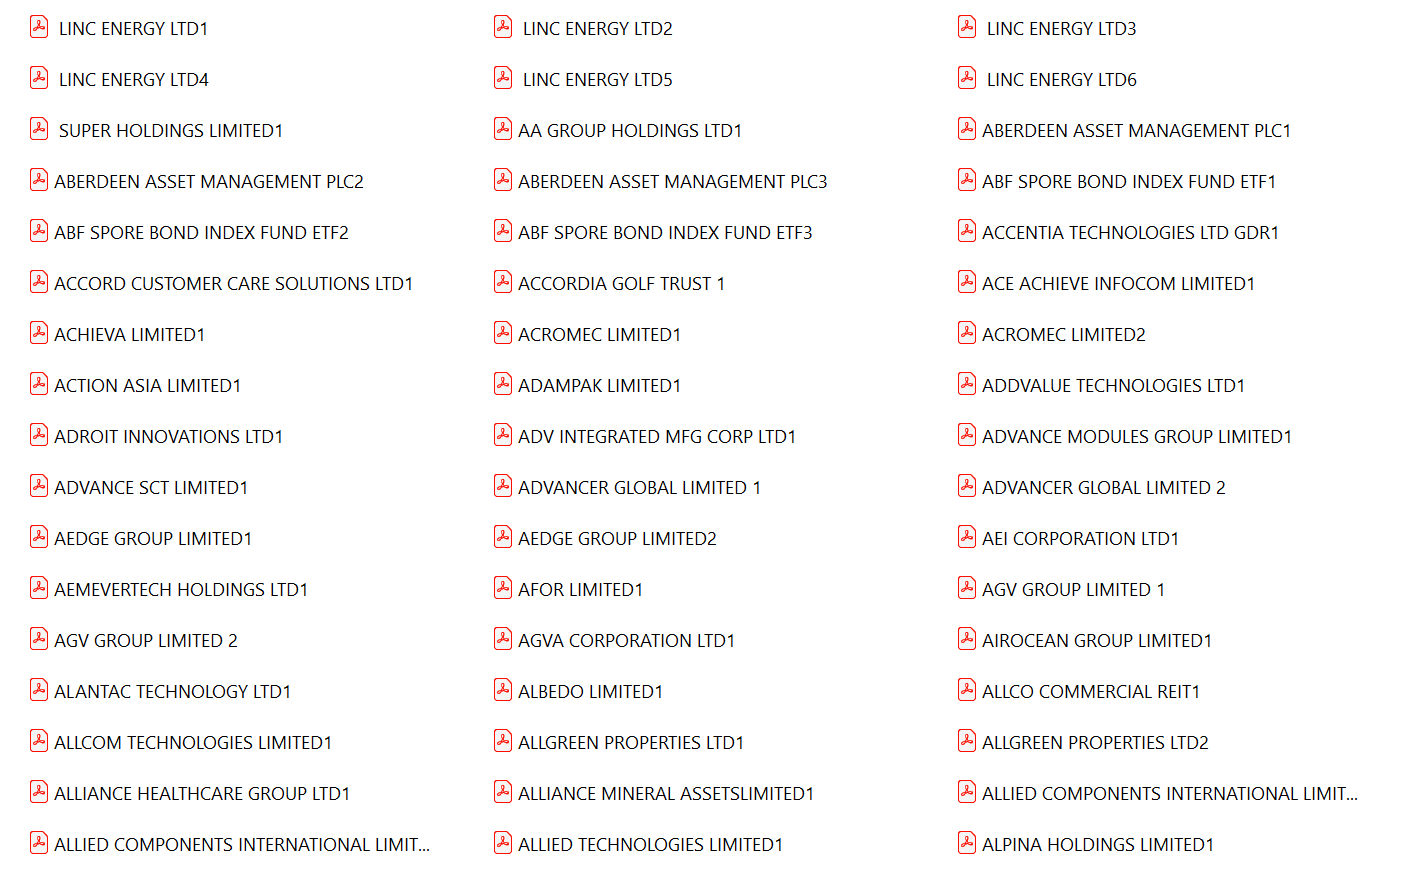

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Figure 1.2 Sample of downloaded IPO prospectus